In [1]:
from scipy import ndimage

In [2]:
from skimage.measure import find_contours

In [3]:
from os import listdir, walk
import os
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

from skimage.transform import resize

import matplotlib.pyplot as plt
import pickle

%matplotlib inline


In [4]:
import time

## Preprocess Images

In [7]:
def get_train_images(images):
    return uniform_reshape(images, (256,256,3))
 

In [8]:
def get_train_labels(submasks):
    masks = {}
    for key in submasks.keys():
        masks[key] = combine_output_mask(submasks[key])
    return uniform_reshape(masks, (256,256))

def get_test_masks(submasks):
    masks = {}
    for key in submasks.keys():
        masks[key] = combine_test_mask(submasks[key])
    return uniform_reshape(masks, (256,256))
        

In [9]:
def combine_output_mask(masks):
    """ Combines multiple masks into a single mask 
    
    Arguments:
        masks: np.array of masks for given image
    
    Return:
        mask: single mask of joined submasks
    """
    return np.amax(masks, axis=0)

In [10]:
def combine_test_mask(masks):
    """ Combines multiple masks into a single mask with each mask having a unique value
    
    Arguments:
        masks: np.array of masks for given image
    
    Return:
        mask: single mask of joined submasks
    """
    mask = np.zeros((masks[0].shape))
    for i in range(len(masks)):
        mask = np.add(mask, (masks[i] / 255) * (i + 1))
        
    return mask


In [11]:
def create_train_data(images, shape):
    """ Return Numpy Array of Images
    
        Arguments:
            images: list of images(np.array)
            shape: tuple of single image sample size
            
        return:
            train_data: np.array of resized images
    """
    train = []
    for img in images:
        reshaped = imresize(img, shape)
        data.append(reshaped)

    train_data = np.stack(train, axis=0)
    return data

In [12]:
def create_train_labels(images):
    label_data = {}
    weight_map = {}
    count = 0
    for key in images:
        if count % 50 == 0:
             print(count)
            
        count+= 1
        final_mask = combine_mask(key, masks[key])
        label_data[key] = final_mask
    return final_mask

In [13]:
def uniform_reshape(images, shape, rgb=True):

    """ Reshape data from dictionary of matrices to a single multidimensional numpy array 

    Arguments:
    data = Dictionary of numpy arrays representing an image.
    shape = desired shape of output (h,w,c)

    Return:
    numpy array of shape (num_images, h, w, c)
    """
    data = []
    count = 0
    for key in images.keys():
        if count % 500 == 0:
            print(count)
        count += 1    
            
        if rgb:
            image = images[key]
        else:
            image = images[key]
        reshaped = resize(image, shape)
        data.append(reshaped)
        

    data = np.stack(data, axis=0)
    return data



In [14]:
def get_image_ordering(images):
    ordering = []
    for key in images.keys():
        ordering.append(key)
    return ordering

In [15]:
def preserve_original_sizes(images):
    original_image_sizes = {}
    for key in images.keys():
        w,h,c = images[key].shape
        original_image_sizes[key] = (w,h,3)
    return original_image_sizes

# original_image_sizes = preserve_original_sizes(train_images)

# Main Run

In [22]:
images = pickle.load(open('../raw_data/raw_images.p', 'rb'))
submasks = pickle.load(open('../raw_data/raw_masks.p', 'rb'))

In [45]:
#Read Image and Mask Paths
train_X =get_train_images(images)
train_Y = get_train_labels(submasks)

0


/home/kenkang/anaconda3/envs/deeplearning/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


500
0
500


In [63]:
train_Y_layer = get_test_masks(submasks)

0


/home/kenkang/anaconda3/envs/deeplearning/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


500


13.0

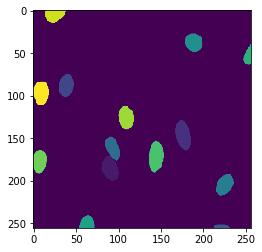

In [66]:
plt.imshow(train_Y_layer[20])
np.amax(train_Y_layer[20][10])

In [67]:
pickle.dump(train_Y_layer, open('../baseline_data/train_Y_layer.p', 'wb'))

In [5]:
test_images = pickle.load(open('../raw_data/raw_test_images.p', 'rb'))

In [17]:
# Resize Test Images
test_X = get_train_images(test_images)

0


/home/kenkang/anaconda3/envs/deeplearning/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kenkang/anaconda3/envs/deeplearning/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


500
1000
1500
2000
2500
3000


In [18]:
test_X.shape

(3019, 256, 256, 3)

In [21]:
pickle.dump(test_X, open('../test_X_baseline.p', 'wb'), protocol=4)

## Save data in Pickle File
Uploading to and reading directly from Google Cloud Storage is slow. Pickle file allows for quick access to data

In [17]:
pickle.dump(train_X, open('train_X_baseline.p', 'wb'))
pickle.dump(train_Y, open('train_Y_baseline.p', 'wb'))

NameError: name 'train_X' is not defined

In [16]:
type(test_X)

numpy.ndarray

In [17]:
pickle.dump(test_X[:1500], open('test_X_baseline.p', 'wb'))

In [18]:
pickle.dump(test_X[1500:], open('test_X_baseline2.p', 'wb'))

In [ ]:
pickle.dump(num_masks, open('num_masks.p', 'wb'))

In [ ]:
#Contoured
pickle.dump(contoured, open('cnm_mask_labels.p', 'wb'))

In [ ]:
pickle.dump(contour_Y, open('cnm_contour_labels.p', 'wb'))

In [ ]:
def read_test_images(path):
    images = []

    for root,dirs,files in os.walk(path):
        if 'images' in dirs:
            image_path = ''
            for image in listdir(root + '/images'):
                image_path = root + '/images/%s' % image
                images.append(image_path)
    return images

test_images = read_test_images("../stage1_test")

In [ ]:
test_image_data = create_train_data(test_images)

In [ ]:
test_X = uniform_reshape(test_image_data, (1,256,256,3))


In [ ]:
test_ordering = get_image_ordering(test_image_data)
test_sizes = preserve_original_sizes(test_image_data)

In [ ]:
pickle.dump(test_X, open('test_images.p', 'wb'))
pickle.dump(test_sizes, open('test_sizes.p', 'wb'))
pickle.dump(test_ordering, open('test_ordering.p', 'wb'))


In [ ]:
pickle.dump(train_Y, open('weight_map.p', 'wb'))


In [ ]:
plt.imshow(train_Y[652,:,:,0])

In [ ]:
test_ordering

In [ ]:
train_Y

In [ ]:
contour_map = np.zeros(train_Y[0,:,:,0].shape)
print(contour_map.shape)
for contour in find_contours(train_Y[0,:,:,0], 100, fully_connected='low' ,positive_orientation='high'):
    for coord in contour:
        contour_map[int(round(coord[0])),int(round(coord[1]))] = 1
plt.figure()
plt.imshow(train_Y[0,:,:,0])
plt.figure()
plt.imshow(contour_map)

In [ ]:


sample_image = images[2]
sample_mask = masks[sample_image]

sample = combine_mask_weighted(sample_image, sample_mask)
plt.figure()
plt.imshow(sample)
# [imreadx for x in sample_mask]

In [ ]:
plt.figure()
# plt.imshow(sample_image[0,:,:,0])
plt.figure()
plt.imshow(sample)
# plt.imshow(imread(sample_image))